In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

dataset_path = tf.keras.utils.get_file("auto-mpg.data",
                                       "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

# Import los datso usando la librería Pandas
column_names = ['MPG','Cylinders', 'Displacement',
                'Horsepower', 'Weight', ' Acceleration',
                'Model Year', 'Origing']

raw_dataset = pd.read_csv(dataset_path, names=column_names,
                          na_values='?',comment='\t',
                          sep=" ",skipinitialspace=True)

dataset = raw_dataset.copy()

dataset.tail()

   8192/Unknown - 0s 0us/step

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origing
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [2]:
dataset = dataset.dropna() # Se borran los datos que faltan de elementos
print(dataset.isna().sum())

MPG              0
Cylinders        0
Displacement     0
Horsepower       0
Weight           0
 Acceleration    0
Model Year       0
Origing          0
dtype: int64


In [ ]:
# Técnica one-hot
# Se cambian los datos de origen que van del 1-3 por los nombres de los países
origin = dataset.pop('Origin')
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [ ]:
# Repartiremos los datos mediante el método sample()
# Indicando el argumento frac inicializado a 0.8 que queremos usar
# el 80% de los datos para entrenamiennto, y que los almacenamos en train_dataset

train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset=dataset.drop(train_dataset.index) # El resto de datos se almacenan en test_dataset

# Separar la columna de datos que contine los valores que queremos predecir
train_labels = train_dataset.pop('MPG')
test_labels=test_dataset.pop('MPG')


In [ ]:
# Es importante normalizar los datos
# Con pandas podemos ver medias y desviaciones
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [ ]:
# Normalizar los datos
def norm(x):
  return(x-train_stats['mean'])/train_stats['std']

# Esta función reescala las características en un rango [0,1] (normalización) y
# centra las columnas de características con respecto a una media 0 con desviación
# estándar 1 (estandarización), de forma que las columnas de características tengan
# los mismos parámetros que una distribución normal estándar (media cero y varianza unidad)

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

normed_train_stats = normed_train_data.describe().transpose()
normed_train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,1.824443e-16,1.0,-1.457657,-0.869348,-0.869348,1.483887,1.483887
Displacement,314.0,8.627211e-17,1.0,-1.220325,-0.860894,-0.424785,0.675074,2.489002
Horsepower,314.0,-9.900078e-18,1.0,-1.545283,-0.751241,-0.272190,0.607162,3.153347
Weight,314.0,-8.485781e-17,1.0,-1.589352,-0.869478,-0.198782,0.732017,2.547401
Acceleration,314.0,-5.148041e-16,1.0,-2.710152,-0.630725,-0.021237,0.588250,3.313017
Model Year,314.0,9.772791e-16,1.0,-1.604642,-0.788458,0.027726,0.843910,1.660094
USA,314.0,7.920062e-17,1.0,-1.286751,-1.286751,0.774676,0.774676,0.774676
Europe,314.0,1.980016e-17,1.0,-0.465148,-0.465148,-0.465148,-0.465148,2.143005
Japan,314.0,5.374328e-17,1.0,-0.495225,-0.495225,-0.495225,-0.495225,2.012852


In [ ]:
# DESARROLLO DEL MODELO
# 1. Definición del modelo
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

def build_model():
  model = Sequential()
  model.add(Dense(64, activation='relu',
                  input_shape=[len(train_dataset.keys())]))
  model.add(Dense(64,activation='relu'))
  model.add(Dense(1))
  return model

model=build_model()
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                640       
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Configuración del modelo
optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae','mse'])

In [ ]:
# Entrenamiento del modelo
EPOCHS = 1000

history = model.fit(
    normed_train_data, train_labels,
    epochs=EPOCHS,validation_split=0.2, verbose=1)
# Con validation_split apatamos un 20% para los los datos de validación


Epoch 1/1000
8/8 [==============================] - 1s 30ms/step - loss: 572.6130 - mae: 22.7100 - mse: 572.6130 - val_loss: 566.7347 - val_mae: 22.5833 - val_mse: 566.7347
Epoch 2/1000
8/8 [==============================] - 0s 8ms/step - loss: 524.6019 - mae: 21.6974 - mse: 524.6019 - val_loss: 516.5410 - val_mae: 21.5135 - val_mse: 516.5410
Epoch 3/1000
8/8 [==============================] - 0s 10ms/step - loss: 475.8396 - mae: 20.6327 - mse: 475.8396 - val_loss: 459.2975 - val_mae: 20.2146 - val_mse: 459.2975
Epoch 4/1000
8/8 [==============================] - 0s 7ms/step - loss: 421.4917 - mae: 19.3341 - mse: 421.4917 - val_loss: 397.7111 - val_mae: 18.7130 - val_mse: 397.7111
Epoch 5/1000
8/8 [==============================] - 0s 7ms/step - loss: 362.4373 - mae: 17.8498 - mse: 362.4373 - val_loss: 331.5355 - val_mae: 16.9611 - val_mse: 331.5355
Epoch 6/1000
8/8 [==============================] - 0s 10ms/step - loss: 301.4479 - mae: 16.1504 - mse: 301.4479 - val_loss: 266.3982 - va

In [ ]:
# 4. Evaluación del modelo
hist = pd.DataFrame(history.history)
hist['epoch']=history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.924433,1.163755,2.924433,10.314934,2.477858,10.314934,995
996,3.003380,1.122963,3.003380,9.838910,2.411499,9.838910,996
997,2.843183,1.072621,2.843183,10.488408,2.467057,10.488408,997
998,2.950064,1.118654,2.950064,10.367377,2.463836,10.367377,998
999,2.884555,1.076285,2.884555,11.079321,2.481077,11.079321,999


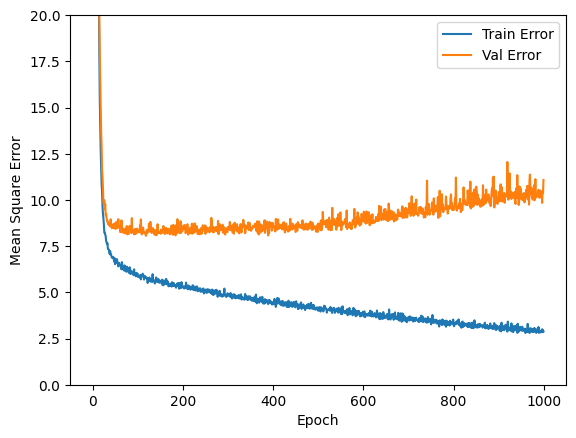

In [ ]:
# Ver gráficamente cómo evoluciona el entrenamiento

def plot_history(history):
  hist=pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'], label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)

# Se está sobreajustando(overfitting). Es decir, se está sobreentrenando
# y se ajusta demasiado a los datos de entrenamiento; cuando vea datos que
# no han sido usados para entrenar, el modelose comportará mucho peor.

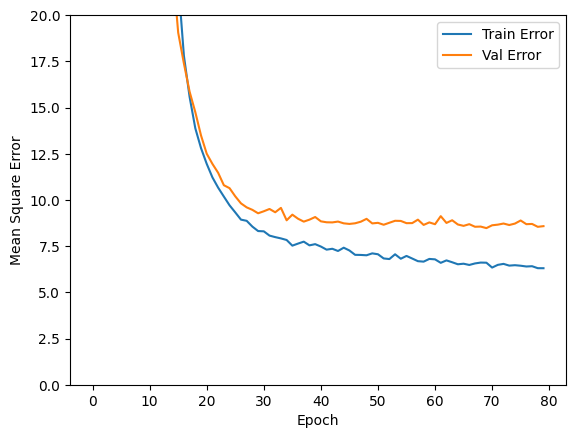

In [ ]:
model = build_model()

optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae', 'mse'])

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0,
                    callbacks=[early_stop])
plot_history(history)

In [ ]:
# Evaluación del modelo con los datos de prueba

loss, mse, mae = model.evaluate(normed_test_data, test_labels)
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))
print("Testing set Mean Sqr Error: {:5.2f} MPG".format(mse))

# Es un error absoluto de 0.022 litros por 100km


# Se usó el error MSE, pero también se puede usar el error MAE, puesto que
# los valores finales los expresamos en MAE

3/3 [==============================] - 0s 5ms/step - loss: 5.3790 - mae: 1.8102 - mse: 5.3790
Testing set Mean Abs Error:  5.38 MPG
Testing set Mean Sqr Error:  1.81 MPG
